**# House Price Prediction**

## Data Preprocessing and feature engineering

**Author** - `Prasad Parjane`

**Source**-(https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv)

**Objective** - To predict the sales price of each house using the feature engineering and advanced regression techniques like random forest and gradient boosting



In [ ]:
# import required python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **STEP 1 : LOAD THE DATASET AMD INSPECTION OF DATASET**

Importing the required python libraries. Thereafter loading the dataset and inspecting the dataset by printing the first 5 rows of the dataset

DATASET : 
1. test.csv
2. train.csv

In [ ]:
df = pd.read_csv(r"C:\Users\Asus Vivobook 15\Desktop\CSI\Week5_Assignment\Data_Files\train.csv")
print(f"Shape of the dataset: {df.shape}")

print("\nColumns in the dataset:")
df.info()

print("\nFirst few rows of the dataset:")
print(df.head())

## **STEP 2: ANALYZING THE MISSING VALUES**

Analyzing the missing helps us to know the missing values and required cleaning. It helps to ensure training and working the model without any errors.

METHODS HANDLING THE MISSING VALUES AND COLUMNS
1. Dropping if they are not informative
2. Imputing if they contain useful but incomplete information.

In [8]:
print("Null Value statistics of the dataset:")
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

Null Value statistics of the dataset:


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

## **Step 3: Handling Missing Values**

We address the missing values in a strategic way based on the proportion of missingness and the nature of each column:

1. DROP COLUMNS 
- `PoolQC, MiscFeature, Alley, Fence`: Over 75% missing values, low correlation with SalePrice, so we drop these columns.

2. Categorical Columns – Fill with 'None':
- Columns like `FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, BsmtQual,` etc., indicate absence when missing. We'll fill these with 'None'.

3. Numerical Columns – Fill with 0:
- `GarageYrBlt, MasVnrArea, BsmtFinSF1, etc.` can be filled with 0 when the feature is absent.

4. Numerical Column – Fill with Median:
- `LotFrontage`: Impute using median grouped by Neighborhood.

**This step ensures a clean dataset ready for feature engineering and modeling.**

In [9]:
# Drop high-missing columns
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

# Fill categorical columns with 'None'
categorical_none = ['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                    'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                    'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
df[categorical_none] = df[categorical_none].fillna("None")

# Fill numerical columns with 0
numerical_zero = ['GarageYrBlt', 'MasVnrArea']
df[numerical_zero] = df[numerical_zero].fillna(0)

# Fill LotFrontage with median based on Neighborhood
df['LotFrontage'] = df.groupby("Neighborhood")['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Fill Electrical with mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [10]:
print("\nNull Value statistics after handling:")
missing_values_after = df.isnull().sum()
missing_values_after = missing_values_after[missing_values_after > 0].sort_values(ascending=False)
print(missing_values_after)


Null Value statistics after handling:
Series([], dtype: int64)


## ** STEP 4 - EXPLORATORY DATA ANALYSIS (EDA) **
We'll perform univariate and bivariate analysis using visualizations like histograms, boxplots, scatter plots, and correlation heatmaps. These help us understand the data distribution and how various features relate to the target variable `SalePrice`.


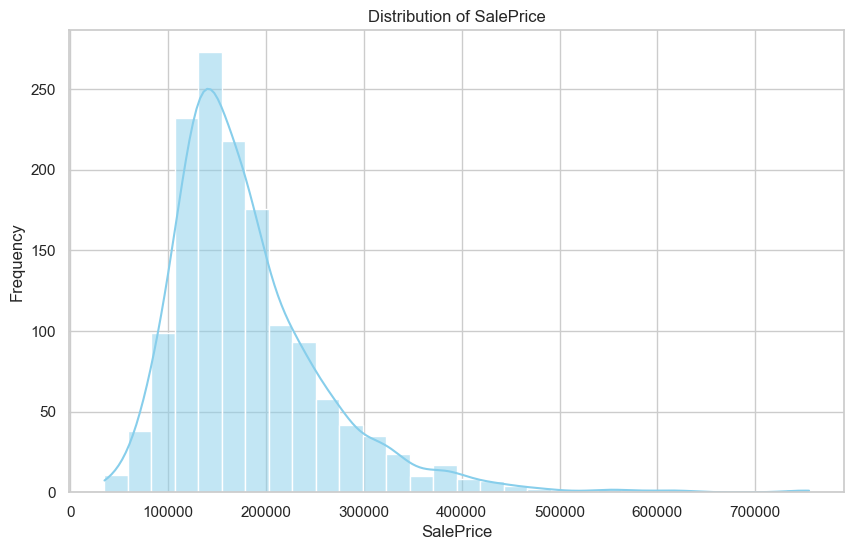

In [11]:
# 4.1 Visualizing the distribution of SalePrice
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

C:\Users\Asus Vivobook 15\AppData\Local\Temp\ipykernel_21220\2921757.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='Pastel2')


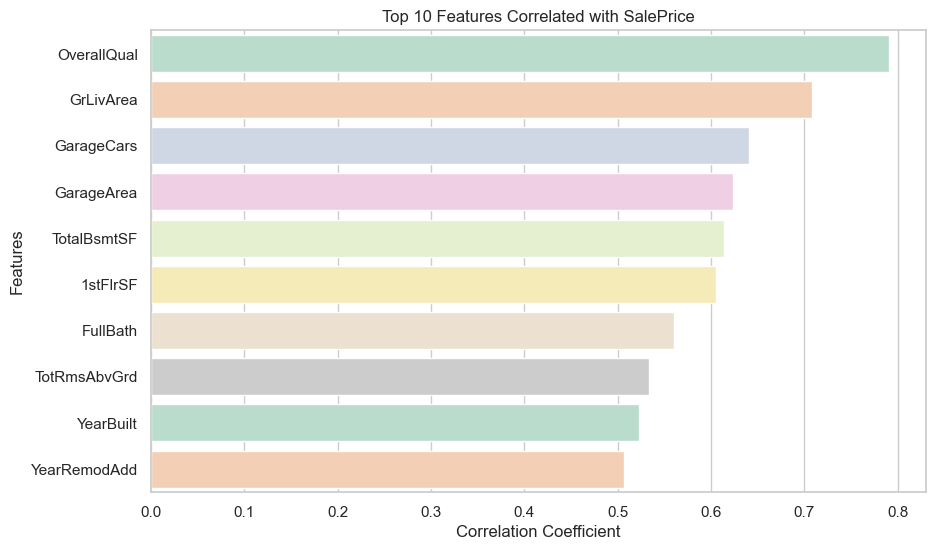

In [22]:
# 4.2) Visualizing the correlation of features with SalePrice
numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation = numeric_df.corr()['SalePrice'].sort_values(ascending=False)

top_corr = correlation[1:11]  # Exclude 'SalePrice' itself

plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='Pastel2')
plt.title('Top 10 Features Correlated with SalePrice')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()



**## *Observations of Step 4.1 and 4.2:***
SalePrice is right-skewed, indicating that most houses are priced lower, with a few high-value outliers.
Features like GrLivArea, TotalBsmtSF, and GarageCars, show a positive correlation with SalePrice.

In [ ]:
# 4.3) Visualizing the correlation heatmap of numeric features
plt.figure(figsize=(16, 12))
sns.heatmap(numeric_df.corr(), annot=False, cmap='blue-yellow', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

KeyError: "'Sequential' is not a known colormap name"

<Figure size 1600x1200 with 0 Axes>